# Importing the Libraries

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [87]:
df=pd.read_csv(r"C:\Users\Sundar\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [88]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [89]:
df.drop(columns=["User ID","Gender"], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [90]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

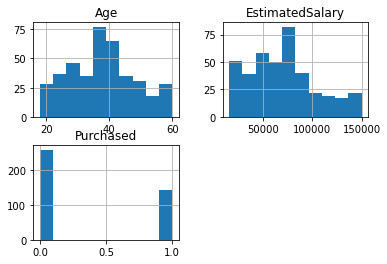

In [91]:
df.hist()

##  Since there is a Gaussian-like Distribution in 'Age' and 'EstimatedSalary', we need to do Standardization.

# Splitting the dataset into the Training set and Test set

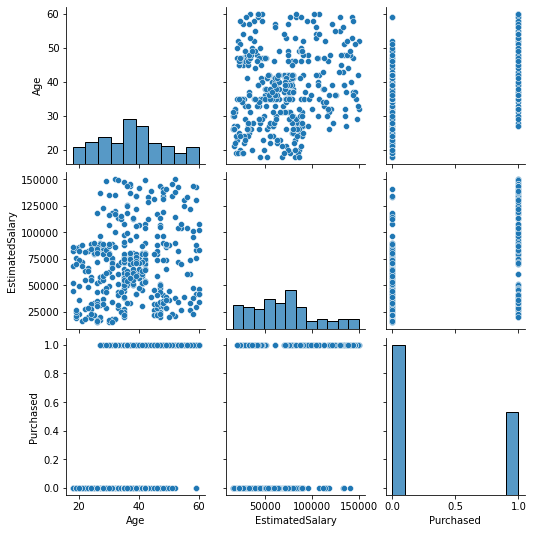

In [92]:
sns.pairplot(df)

since there is a clear linear decision boundary, we can use linear kernel in svc

In [93]:
y=df['Purchased'].values
x=df.drop(['Purchased'], axis=1).values


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

In [95]:
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)


x_train-shape :  (280, 2)
y_train-shape :  (280,)
x_test-shape :  (120, 2)
y_test-shape :  (120,)


# Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# Fitting SVM to the Training set

In [97]:
#from sklearn import svm
from sklearn.svm import SVC

SVM = SVC(kernel='linear', gamma='scale')
SVM.fit(x_train, y_train) 

SVC(kernel='linear')

# Predicting the Test set results

In [99]:
y_pred = SVM.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [100]:
df_new = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df_new

,True_Target,Predicted_target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115,1,1
116,0,0
117,1,1
118,1,1


# Making the Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

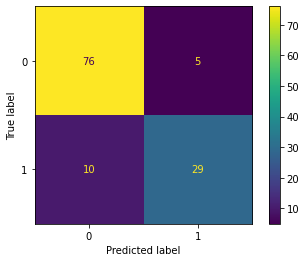

In [102]:
#viewing Confusion matrix in Testing set
cnf_matrix_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test, display_labels=SVM.classes_).plot()

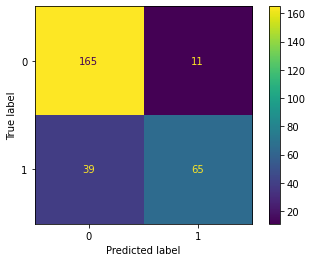

In [104]:
#viewing Confusion matrix in Training set
y_pred_train = SVM.predict(x_train)
y_pred_train

cnf_matrix_test = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test, display_labels=SVM.classes_).plot()

# Visualising the Training set results

In [107]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

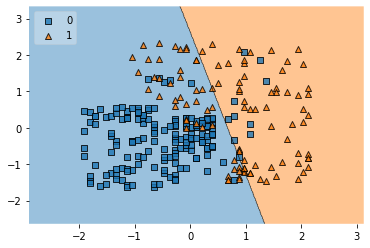

In [109]:
plot_decision_regions(x_train, y_train, clf=SVM, legend=2, )

# Visualising the Test set results

<AxesSubplot:>

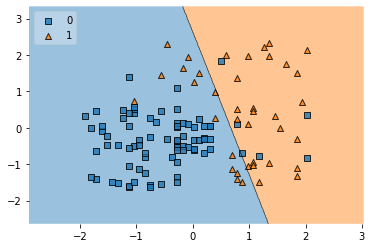

In [110]:
plot_decision_regions(x_test, y_test, clf=SVM, legend=2 )


In [111]:


from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None) 
print(F1_score)



[0.91017964 0.79452055]


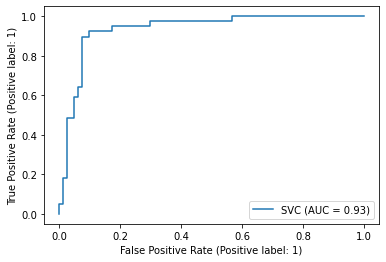

In [113]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(SVM, x_test, y_test)

plt.show()